<span style="color: blue; font-family: 'Palatino Linotype'; font-size: 30px;">Exploring the Titanic Incident</span>

By: Raza Anees

<span style="font-family:'Palatino Linotype'; font-size:25px; text-decoration:underline;">Introduction</span>

<p style="font-family:arial;">The RMS Titanic sank during its maiden journey on April 15, 1912 after colliding with an iceberg. The tragedy resulted in the death of 1502 out of 2224 passengers and crew onboard and made international headlines.
</p>

<p style="font-family:arial;">In this project, I will sift through data of 891 out of the 2224 passengers and crew members to discover a variety of survival factors, if any exist. 
</p>
***

<span style="font-family:'Palatino Linotype'; font-size:25px; text-decoration:underline;">Questions</span>

<p style="font-family:arial;">
    <ol>
        <li>Which of the following factors had the most impact on survival:</li>
            <ul>
                <li>Passenger Age</li>
                <li>Passenger Sex</li>
                <li>Passenger Class</li>
                <li>Whether or not passengers were travelling with family (parents, spouses, siblings, and children).</li>
            </ul>
            <br>
        <li>Which port had the wealthiest residents?</li>
    </ol>
</p>
***

<span style="font-family:'Palatino Linotype'; font-size:25px; text-decoration:underline;">Data Wrangling</span>

In [1]:
#Import the necessary libraries that will be used for this analysis
import numpy as np #for creating arrays and data containers for further operations
import pandas as pd #for importing the dataset and manipulations of data
import matplotlib.pyplot as plt #for creating various visuals
import seaborn as sns #for decorating plots and creating advanced visuals such as heatmaps

#Import the data set
titanic = pd.read_csv("~/Documents/Programming/Data_Analyst/Project_2/P2/titanic_data.csv",header=0)

#Test if data import successful
titanic.head(3) #Print top 3 lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
#Check the type of data that was imported
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



<p style="font-family:arial;">
    It is clear from the information above that the "Age", "Cabin", and "Embarked" categories are missing some values. Care must be taken when evaulating statistics involving any of those categories. The "Age" and "Embarked" categories will be used to answer the questions posed above so they must be cleaned.
</p>

<p style="font-family:arial;">Let's find all of the missing values in the "Age" category.
</p>

In [3]:
#Show all of the entries that are missing the age
print titanic[titanic['Age'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 12 columns):
PassengerId    177 non-null int64
Survived       177 non-null int64
Pclass         177 non-null int64
Name           177 non-null object
Sex            177 non-null object
Age            0 non-null float64
SibSp          177 non-null int64
Parch          177 non-null int64
Ticket         177 non-null object
Fare           177 non-null float64
Cabin          19 non-null object
Embarked       177 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB
None


<p style="font-family:arial;">The above information confirms that there are 177 records with missing passenger age values. Since the original sample size is about 1/3 of the population (891 out of 2224), the records with missing age values will not be excluded because that would further shrink the sample size. The missing age records will be filled in with median values of the dataset instead. Median values were chosen because outliers have a much larger effect on the mean than they do on the median.</p>

<p> Median values of certain categories will be found instead of a blanket median for the entire dataset to minimize noise in the dataset. For example, the missing age record of a class 2, female passenger travelling with family will be filled with the median age of all class 2, female passengers travelling with family.</p>

<p>To do this, let's examine whether a traveller was alone or with family by creating a new column in the dataframe.</p>

In [4]:
#A function to determine whether someone was travelling with their family. 1 indicates true and 0 indicates false.
def with_fam(dataframe):
    if dataframe['Parch']>0 or dataframe['SibSp'] > 0:
        return 1
    else:
        return 0

#Apply the function to the database to add a column determining family travel
titanic['With_Family'] = titanic.apply(with_fam,axis=1).astype(int)
#Ensure results are as expected
titanic[['Name','SibSp','Parch','With_Family']].head(4)

,Name,SibSp,Parch,With_Family
0,"Braund, Mr. Owen Harris",1,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1
2,"Heikkinen, Miss. Laina",0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1


<p>Let's also assign a numeral value for passenger sex to help calculate median values in the next step.</p>

In [5]:
titanic['Gender'] = titanic['Sex'].map({'male':0, 'female':1}).astype(int)
titanic[['Name','Sex','Gender']].head(4)

,Name,Sex,Gender
0,"Braund, Mr. Owen Harris",male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1


<p>Now that it has been determined whether each person was travelling with family or not and a numerical gender value has been assigned, it is time to calculate the median ages of the following sub-groups:
<ul>
    <li>male, class 1, travelling with family</li>
    <li>male, class 2, travelling with famiy</li>
    <li>male, class 3, travelling with famiy</li>
    <li>male, class 1, travelling without famiy</li>
    <li>male, class 2, travelling without famiy</li>
    <li>male, class 3, travelling without famiy</li>
    <li>female, class 1, travelling with famiy</li>
    <li>female, class 2, travelling with famiy</li>
    <li>female, class 3, travelling with famiy</li>
    <li>female, class 1, travelling without famiy</li>
    <li>female, class 2, travelling without famiy</li>
    <li>female, class 3, travelling without famiy</li>
</ul>
<br>
Class 1 = upper class, class 2 = middle class, class 3 = lower class
</p>

In [6]:
#Set up array for storing values

median_ages = np.zeros((2,6))#using Numpy zeros function
print median_ages #check if successful
print"" #Leave a gap

#Store median ages in the array with gender (male, female) as index and class, family travel as columns
for i in range(0,2): #gender
    for j in range(0,2): #family travel
        for k in range(0,3): #class
            median_ages[i,j*3+k] = titanic[(titanic['Gender'] == i) & (titanic['With_Family'] == j) & \
                                           (titanic['Pclass'] == k+1)]['Age'].dropna().median()
median_ages

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]



array([[ 45.  ,  30.  ,  27.  ,  37.  ,  29.  ,  17.5 ],
       [ 32.5 ,  32.25,  22.  ,  35.  ,  25.5 ,  19.5 ]])

<p> The median ages of the subgroups are shown below: </p>

Populating the interactive namespace from numpy and matplotlib


<Container object of 12 artists>

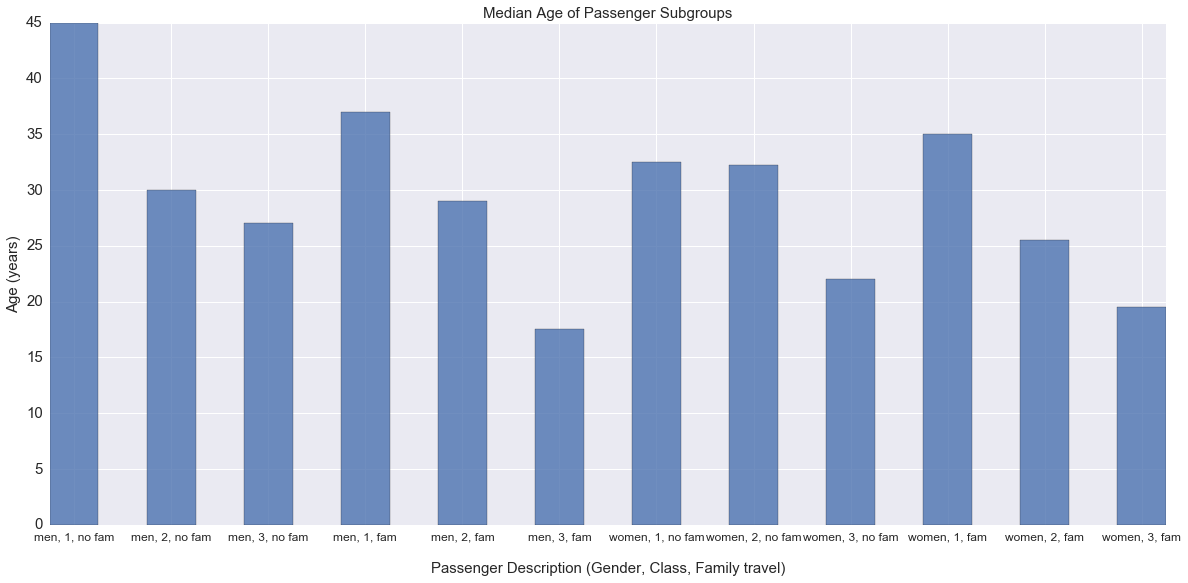

In [7]:
%pylab inline

#set up the plot basics
fig = plt.figure(figsize = (20,9))
ax = fig.add_subplot(111)
#proper x-axis labels
x = np.arange(12)
x_labels = np.array(['men, 1, no fam', 'men, 2, no fam', 'men, 3, no fam',\
           'men, 1, fam', 'men, 2, fam','men, 3, fam','women, 1, no fam', 'women, 2, no fam', 'women, 3, no fam',\
           'women, 1, fam', 'women, 2, fam','women, 3, fam'])
#assign desired x-axis labels for display on plot and change the font size for readibility
plt.xticks(x, x_labels, fontsize=12)
plt.yticks(fontsize=15)
#set the plot titles (main, x/y-axes)
plt.title('Median Age of Passenger Subgroups', fontsize = 15)
plt.xlabel('Passenger Description (Gender, Class, Family travel)', fontsize=15)
plt.ylabel('Age (years)',fontsize=15)
#lower the x-axis label
ax.xaxis.labelpad = 20
#organize the information for the y-axis
y = np.concatenate((median_ages[0],median_ages[1]),axis=0)
#show a basic bar graph
ax.bar(x, y,width=0.5, align = 'center', alpha=0.8)

<p>The information above shows that single travellers in class 1 were generally older than those travelling with their family in lower classes. Also, men tend to be older than women overall. Both of the previous statements are observations only and are not tested statistically.</p>

<p>The missing age records in the titanic database will now be populated with the median values depending on the passenger subgroup. For example, if there is no age record for a female, class 3 passenger travelling with her family, then her age will be recorded as 19.5 years. This is done to introduce as little noise in the data as possible and keep the medians of the subgroups constant. A separate column will be created so that the original data is not altered.</p>

In [8]:
#Create new column to retain original data
titanic['Filled_Age'] = titanic['Age']

#Assign median age values from the array into the new column
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,3):
            titanic.loc[(titanic.Age.isnull()) & (titanic.Gender == i) & (titanic.Pclass == k+1) & (titanic.With_Family == j),\
                        'Filled_Age'] = median_ages[i,j*3+k]

#Check some records that were initially missing age
titanic[(titanic['Age'].isnull())][['Name','Filled_Age','Age','Sex','Pclass','With_Family']].head(3)

,Name,Filled_Age,Age,Sex,Pclass,With_Family
5,"Moran, Mr. James",27.0,NaN,male,3,0
17,"Williams, Mr. Charles Eugene",30.0,NaN,male,2,0
19,"Masselmani, Mrs. Fatima",22.0,NaN,female,3,0


<p>The table above shows that the median ages were correctly assigned. The dataframe now has all of the age values that will be used for further analysis.</p>

<p>The only other column with missing records that will be used in analysis is "Embarked". Let's find out where these empty values are. </p>

In [9]:
#to get the index numbers of the missing 'Embarked' values
null_embarked_index = titanic[titanic["Embarked"].isnull()].index.values.astype(int)
print "These are the index numbers of the missing Embarked values"
print null_embarked_index
print ''
print 'These are the complete records of those index values'
titanic[titanic['Embarked'].isnull()]

These are the index numbers of the missing Embarked values
[ 61 829]

These are the complete records of those index values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Family,Gender,Filled_Age
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,1,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,1,62.0


<p>It seems that both passengers with missing "Embarked" records have the same ticket numbers and paid the same fair. Let's see if this is common and if there are other instances of this.</p>

In [10]:
#Sort the tickets into groups to see if there are other cases of the same ticket numbers
sorted_tickets = titanic.sort_values('Ticket')
#Only the top 50 rows of the sorted tickets dataframe were included to avoid crowding
sorted_tickets[:50].groupby('Ticket').groups

{'110152': [504, 257, 759],
 '110413': [262, 558, 585],
 '110465': [110, 475],
 '110564': [430],
 '110813': [366],
 '111240': [170],
 '111320': [462],
 '111361': [523, 329],
 '111369': [889],
 '111426': [604],
 '111427': [507],
 '111428': [187],
 '112050': [806],
 '112052': [633],
 '112053': [887],
 '112058': [815],
 '112059': [263],
 '112277': [209],
 '112379': [766],
 '113028': [711],
 '113043': [331],
 '113050': [536],
 '113051': [452],
 '113055': [857],
 '113056': [284],
 '113059': [83],
 '113501': [782],
 '113503': [377],
 '113505': [166, 356],
 '113509': [54],
 '113510': [351],
 '113514': [252],
 '113572': [61, 829],
 '113760': [435, 390, 802, 763],
 '113767': [185],
 '113773': [748],
 '113776': [336, 151],
 '113781': [708]}

<p>It seems there are a few instances of multiple tickets with the same number. Index numbers 110 and 475 have the same ticket number as well as index numbers 504, 257, and 759. Let's take a look at these records to see whether they differ in embarked place and/or fare paid.</p>

In [11]:
print titanic.iloc[110][['Name','Ticket','Embarked','Fare']]
print titanic.iloc[475][['Name','Ticket','Embarked','Fare']]
print ""
print titanic.iloc[504][['Ticket','Embarked','Fare']]
print titanic.iloc[257][['Ticket','Embarked','Fare']]
print titanic.iloc[759][['Ticket','Embarked','Fare']]

Name        Porter, Mr. Walter Chamberlain
Ticket                              110465
Embarked                                 S
Fare                                    52
Name: 110, dtype: object
Name        Clifford, Mr. George Quincy
Ticket                           110465
Embarked                              S
Fare                                 52
Name: 475, dtype: object

Ticket      110152
Embarked         S
Fare          86.5
Name: 504, dtype: object
Ticket      110152
Embarked         S
Fare          86.5
Name: 257, dtype: object
Ticket      110152
Embarked         S
Fare          86.5
Name: 759, dtype: object


<p>Both cases above display that people with the same ticket number paid the same fare and embarked from the same place; however, the tickets belong to different people. Looking at the evidence above, it is fair to conclude that both of the tickets under investigation embarked from the same place.</p>

<p>Now let's investigate if there is a relationship between ticket number and place of embarkment. The sorted tickets column will be compared against the embarked place to see if certain letter or number combinations of tickets are more likely to originate from a certain place.</p>

In [12]:
pd.set_option('display.max_rows', 100)#Display more records
pd.set_option('display.max_columns', 100)
sorted_tickets[['Ticket','Embarked']]

,Ticket,Embarked
504,110152,S
257,110152,S
759,110152,S
262,110413,S
558,110413,S
585,110413,S
110,110465,S
475,110465,S
430,110564,S
366,110813,C


<p>The above table shows that most tickets starting with the numbers "1135..." departed from "S". Furthermore, the two missing values are inside a long string of "S" embarkments. Using this observation, along with the previous observations about the same ticket numbers and majority of embarked passengers from "S", it can be fairly concluded that the missing "Embarked" records originated from "S".</p> 

In [13]:
#Set the missing Embarked records as "S"
for i in range(0,len(null_embarked_index)):
    titanic.loc[null_embarked_index[i],"Embarked"] = "S"
    
#Check if there are any missing values left
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
With_Family    891 non-null int64
Gender         891 non-null int64
Filled_Age     891 non-null float64
dtypes: float64(3), int64(7), object(5)
memory usage: 104.5+ KB


<p>The "Embarked" field now has all 891 values, as well as the "Filled_Age" field which will be used for analysis regarding passenger age in the next phase. </p>

<span style="font-family:'Palatino Linotype'; font-size:25px; text-decoration:underline;">Data Exploration</span>

<p>Firstly, let's determine if age was a factor in surviving the Titanic incident. The range of ages in the Titanic dataset will be found along with the mean and standard deviation. These statistics will help in forming bins of the age ranges to display the number of survivors in each age range.
</p>

In [14]:
#Determine total number of survivors
total_surv = titanic['Survived'].sum()
print "Total survivors in the 891 records: ",total_surv
print ""
#Statistics about the age of all passengers in the dataset
print titanic['Filled_Age'].describe()

Total survivors in the 891 records:  342

count    891.000000
mean      29.231392
std       13.486564
min        0.420000
25%       21.000000
50%       27.000000
75%       36.000000
max       80.000000
Name: Filled_Age, dtype: float64


<p>Based on the statistics above, the ages of all of the passengers will be recorded in 9 groups with age range 9. This age range was chosen because it results in round division and remains close to the standard deviation of the ages. For example, the first group will count all of the people that survived aged 0-8, second group will be surviving passengers aged 9-17, etc.</p> 

In [15]:
#Set up an empty array to store the number of surviving passengers ine each age group
tot_surv_age = zeros(9)

#Convert the ages into integers for easy comparison
titanic['Filled_Age'] = titanic['Filled_Age'].round(0).astype(int)

#Record the number of survivors in each age group in the array that was previously set up
for i in range(0,9):
    tot_surv_age[i] = titanic[(titanic['Filled_Age']>=i*9) & (titanic['Filled_Age']<(i*9)+9) & \
                              (titanic['Survived'] == 1)]['Name'].count()

In [16]:
#show number of survivors in each age group
print tot_surv_age
#Check if total number of survivors is consistent
print "Total number of surviviors: ",tot_surv_age.sum()

[ 36.  25.  97.  96.  40.  32.  13.   2.   1.]
Total number of surviviors:  342.0


<p>The results above show that the most number of passengers that survived the Titanic incident were 18 - 26 years old. Next, I will examine the total number of passengers in each age group and the percentage of survivors to determine if age was a factor in surviving the sinking of the Titanic.</p>

In [17]:
tot_pass_age = np.zeros(9)
print tot_pass_age
print ''
#Record the total number of passengers in each defined age group
for i in range(0,9):
    tot_pass_age[i] = titanic[(titanic['Filled_Age']>=i*9) & (titanic['Filled_Age']<(i*9)+9)]['Name'].count()

print tot_pass_age

#Percentage of passengers that survived from each age group
perc_surv_age = np.around(((tot_surv_age/tot_pass_age)*100),decimals=0)
print "Passenger survival percentage by age"
print perc_surv_age

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]

[  54.   59.  265.  275.  102.   86.   35.   13.    2.]
Passenger survival percentage by age
[ 67.  42.  37.  35.  39.  37.  37.  15.  50.]


Populating the interactive namespace from numpy and matplotlib


<Container object of 9 artists>

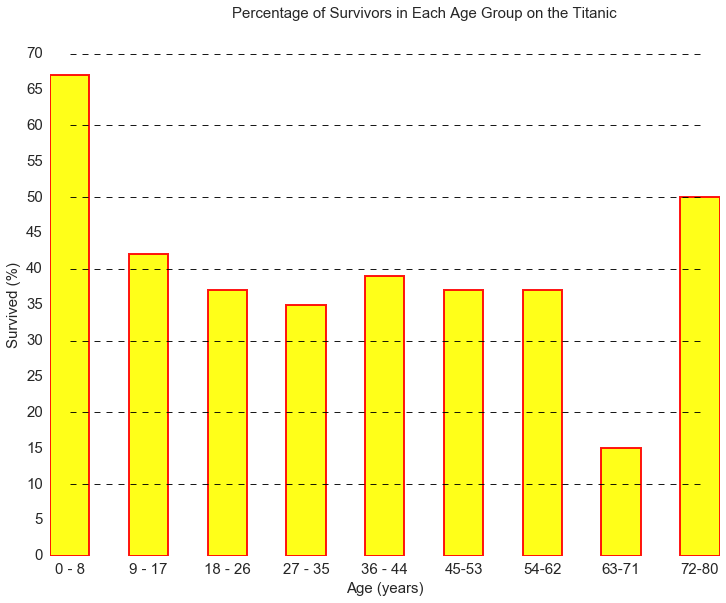

In [18]:
%pylab inline

#Set up the figure in the background
fig = plt.figure(1,figsize(12,9))
#Add a blank canvas onto the figure with the appropriate background color and titles
ax = fig.add_subplot(111, axisbg=("white"))
#Set the labels for the x-axis
x = np.arange(9)
x_label = ["0 - 8", "9 - 17", "18 - 26", "27 - 35", "36 - 44","45-53","54-62", "63-71", "72-80"]

y = perc_surv_age.astype(int)
#Set the limits and axes of the graph
plt.ylim(0,65) #min and max values of the y-axis

plt.xticks(x, x_label, fontsize=15) #set the x-axis as the age range and increase the font
plt.yticks(range(0,75,5), fontsize=15) #set the numbers on the y-axis and increase the font
plt.text(4.5,75,"Percentage of Survivors in Each Age Group on the Titanic",fontsize=15,ha="center")#set the graph title
#set the x and y-axes labels
plt.xlabel("Age (years)",fontsize=15)
plt.ylabel("Survived (%)",fontsize=15)
#make horizontal lines for easy interpretation of graph numbers
for ay in range(0,80,10):
    plt.plot(range(0,9), [ay]*len(range(0,9)), "--",lw=0.9,color='black')
#show the graph
ax.bar(x, y, width = 0.5, align = "center", alpha = 0.9, color = "#ffff00", edgecolor = "red", lw = 2)

<p>The graph above shows that the youngest passengers survived at the highest percentage while the oldest passengers survived at the lowest percentage. An interesting aspect is that passengers between age 9 and 62 survived in roughly the same percentage. From this figure, it is fair to conclude that in this sample, age was a survival factor for only the youngest and oldest passengers. This does not represent the entire population of passengers on the Titanic. </p>

<p>The second survival factor to explore is passenger gender.</p>

In [19]:
#Set up arrays to store the number of passengers of each sex and the number that survived
tot_pass_sex = np.zeros(2)
tot_surv_sex = np.zeros(2)

#populate the arrays
for i in range(0,2):
    tot_pass_sex[i] = titanic[titanic['Gender']==i]['Survived'].count()
    tot_surv_sex[i] = titanic[(titanic['Gender']==i) & (titanic['Survived'] == 1)]['Survived'].count()

In [20]:
#check results
print tot_pass_sex
print tot_surv_sex

#get percentage of survivors from each sex
perc_surv_sex = (tot_surv_sex/tot_pass_sex)*100
print ""
print np.around(perc_surv_sex, decimals=0)#round the numbers to the nearest integer

[ 577.  314.]
[ 109.  233.]

[ 19.  74.]


Populating the interactive namespace from numpy and matplotlib


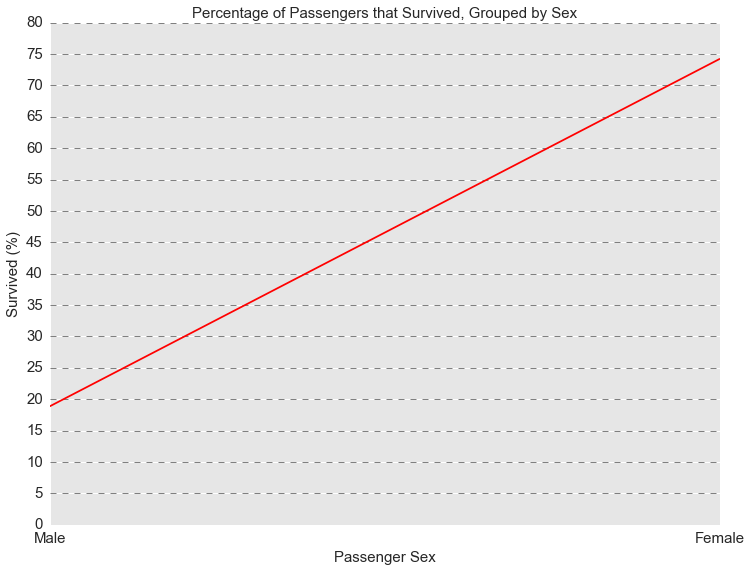

In [21]:
#Show the results (similar code as the graphs above)
%pylab inline

fig = plt.figure(1, figsize(12,9))
ax = fig.add_subplot(111, axisbg = "#e6e6e6")

plt.ylim(0,80)

x = np.arange(2)
x_label = ['Male', 'Female']
plt.xticks(x, x_label, fontsize=15)

y = perc_surv_sex
plt.yticks(range(0,85,5), fontsize=15)

plt.xlabel("Passenger Sex", fontsize=15)
plt.ylabel("Survived (%)", fontsize=15)
plt.title("Percentage of Passengers that Survived, Grouped by Sex", fontsize=15)

#reading markers
for ay in range(0,85,5):
    plt.plot(range(0,2), [ay]*len(range(0,2)),"--",color='black',lw=0.5)

ax.plot(x,perc_surv_sex,"-", color = 'red')

<p>The graph above shows that around 3.5 times more females survived the Titanic incident than males in this sample. Statistical conclusions cannot be drawn from only this number because it is from a sample of 891 out of 2224. Further analysis will be conducted to determine if this was the case for the population.</p>

<p>The next investigation is survival rate based on passenger class and whether class was a factor in determining survivors.</p>

In [22]:
tot_pass_class = np.zeros(3)
tot_surv_class = np.zeros(3)

for j in range(0,3):
    tot_pass_class[j] = titanic[titanic.Pclass == j+1]['Name'].count()
    tot_surv_class[j] = titanic[(titanic.Pclass == j+1) & (titanic.Survived == 1)]['Name'].count()

print tot_pass_class
print tot_surv_class

[ 216.  184.  491.]
[ 136.   87.  119.]


In [23]:
#check if total passengers and survivors matches the numbers previously found
print "Total passengers: ",tot_pass_class.sum()
print ''
print "Total survivors: ",tot_surv_class.sum()

Total passengers:  891.0

Total survivors:  342.0


In [24]:
perc_surv_class = (tot_surv_class/tot_pass_class)*100
print np.around(perc_surv_class, decimals =0)#Round the number to the nearest integer

[ 63.  47.  24.]


Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

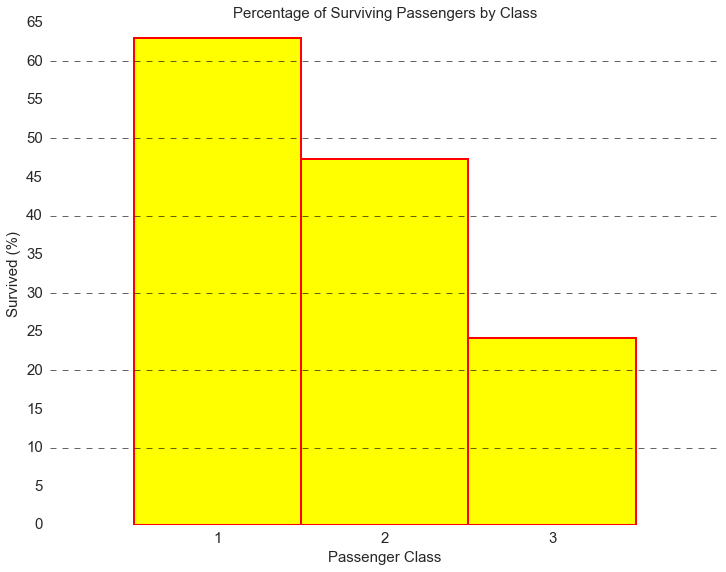

In [25]:
%pylab inline

fig = plt.figure(1, figsize=(12,9))
ax = fig.add_subplot(111, axisbg = "white")

plt.ylim(0,65)

plt.xticks(range(1,4),fontsize=15)
plt.yticks(range(0,70,5), fontsize=15)

plt.title("Percentage of Surviving Passengers by Class",fontsize=15)
plt.xlabel("Passenger Class", fontsize=15)
plt.ylabel('Survived (%)', fontsize=15)

for ay in range(0,70,10):
    plt.plot(range(0,5), [ay]*len(range(0,5)),'--',color='black', lw=0.6)

ax.bar(range(1,4), perc_surv_class, width = 1, align = 'center', color = "#ffff00", edgecolor = "red", lw = 2)

<p>The above figure displays that passengers in higher classes had an approximately 20% higher survival rate than passengers in classes immediately below them starting at 24% survival rate.
</p>

<p>The last factor explored which may contribute to survival is whether or not the passengers were travelling with immediate family members including parents, spouses, siblings, and children.</p>

In [26]:
#same process as for the above 3 factors investigated
tot_pass_fam = np.zeros(2)
tot_surv_fam = np.zeros(2)

for i in range(0,2):
    tot_pass_fam[i] = titanic[titanic.With_Family == i]['Name'].count()
    tot_surv_fam[i] = titanic[(titanic.With_Family == i) & (titanic.Survived == 1)]['Name'].count()

In [27]:
#check for consistency in number of total passengers and survivors
print "Total passengers: ",tot_pass_fam.sum()
print ""
print "Total survivors: ",tot_surv_fam.sum()

Total passengers:  891.0

Total survivors:  342.0


In [28]:
perc_surv_fam = (tot_surv_fam/tot_pass_fam)*100
print np.around(perc_surv_fam, decimals=0)

[ 30.  51.]


Populating the interactive namespace from numpy and matplotlib


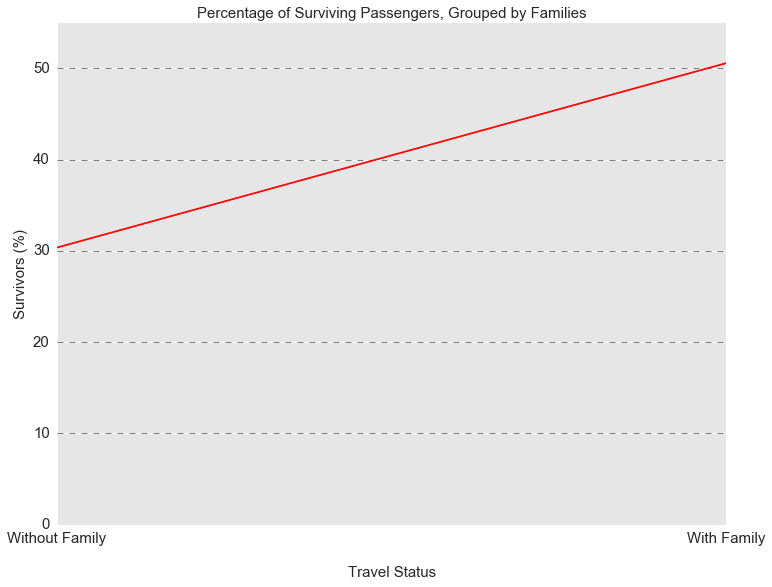

In [29]:
%pylab inline

fig = plt.figure(1, figsize(12,9))
ax = fig.add_subplot(111, axisbg = "#e6e6e6")

plt.ylim(0,55)

plt.xticks(range(0,2), ['Without Family', 'With Family'], fontsize=15)
plt.yticks(range(0,60,10), fontsize=15)

plt.title('Percentage of Surviving Passengers, Grouped by Families', fontsize=15)
plt.xlabel('Travel Status',fontsize=15)
plt.ylabel('Survivors (%)', fontsize=15)

ax.xaxis.labelpad = 20

for ay in range(0,55,10):
    plt.plot(range(0,2), [ay]*len(range(0,2)),"--", color='black',lw=0.5)

ax.plot(range(0,2), perc_surv_fam, color='red')

<p>The final factor under investigation shows that half of the passengers travelling with 1 or more immediate family member(s) survived while only a third of passengers travelling without their family members survived. Again, this result does not imply that travelling with family caused higher survival rates, it is only an observation in this particular sample of Titanic passengers.</p>
***

<p> The two most interesting survival factors, by percentage, that I found were passenger sex and age groups. I did not expect such a large difference in survival percentage between males and females and almost uniform survival rates between ages 9 to 62. I will further investigate these two factors by determining the number of survivors of each sex within their age group. Same age ranges will be used as above.</p>

In [30]:
#Set up a dataframe to store the number of total passengers and survivors by gender and age group
data = np.zeros((9,2))
index = ["0 - 8", "9 - 17", "18 - 26", "27 - 35", "36 - 44","45-53","54-62", "63-71", "72-80"]
column = ['Male', "Female"]

#Collect information of all passengers sorted by gender and age group
for i in range(0,9):
    for j in range(0,2):
        data[i,j] = titanic[(titanic.Filled_Age >=i*9) & (titanic.Filled_Age < (i*9)+9) & (titanic.Gender == j)]\
        ['Name'].count()

In [31]:
#Collect information of all survivors sorted by gender and age group
data1 = np.zeros((9,2))

for i in range(0,9):
    for j in range(0,2):
        data1[i,j] = titanic[(titanic.Filled_Age >=i*9) & (titanic.Filled_Age < (i*9)+9) & (titanic.Gender == j)\
                           & (titanic.Survived == 1)]['Name'].count()

In [32]:
#Determine survival percentage sorted by gender and age group
data2 = (data1/data)*100

#Store survival percentage in a dataframe to accurately display the information
perc_surv_age_sex = pd.DataFrame(data2,index=index, columns = column).fillna(0)
perc_surv_age_sex

,Male,Female
0 - 8,60.714286,73.076923
9 - 17,20.000000,65.517241
18 - 26,13.245033,67.543860
27 - 35,17.241379,84.722222
36 - 44,18.461538,75.675676
45-53,23.809524,73.913043
54-62,12.500000,90.909091
63-71,0.000000,100.000000
72-80,50.000000,0.000000


Populating the interactive namespace from numpy and matplotlib


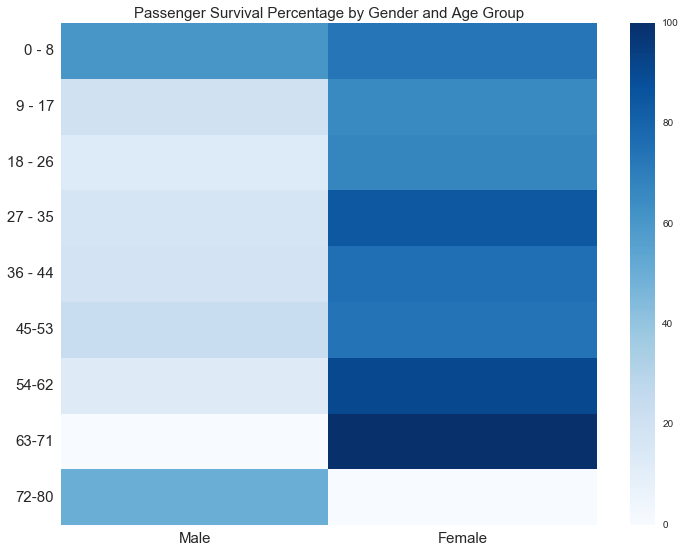

In [33]:
#show this information in a heatmap to determine the stronger survival factor between age and gender
#darker color represents a higher survival rate
%pylab inline

fig = plt.figure(2, figsize(12,9))
ax = fig.add_subplot(111)
#using Seaborn function to generate heatmap
ax = sns.heatmap(perc_surv_age_sex, cmap="Blues", ax=ax)
ax.tick_params(labelsize=15)#change all label sizes
plt.yticks(rotation=0)#display y-axis labels horizontally instead of the default vertical
ax.set_title("Passenger Survival Percentage by Gender and Age Group",size=15)#set heatmap title

<p>The figure above shows that gender contributed more towards survival than age with at least 65% of females surviving in every age group while only one male age group had a survival rate of more than 50%. This also explains that passengers aged 0-8 survived at a higher rate than other age groups because the male and female survival rate are approximately equal for only this age group.</p>
<hr>

<p>The second investigation is the town with the wealthiest people. This will be deducted by the proportion of upper class passengers from each town. Then an independent t-test on the fair paid by passengers from each town will be conducted to determine if this small sample reflects the entire population of the towns.</p>
***

In [34]:
#total number of passengers from each port
tot_embarked = np.zeros((3,1))
tot_embarked = titanic.groupby('Embarked')['Name'].count()
print tot_embarked

#Number of passengers from each port and in each class
titanic.groupby(['Embarked','Pclass']).count()

Embarked
C    168
Q     77
S    646
Name: Name, dtype: int64


PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked Pclass                                                                
C        1                85        85    85   85   74     85     85      85   
         2                17        17    17   17   15     17     17      17   
         3                66        66    66   66   41     66     66      66   
Q        1                 2         2     2    2    2      2      2       2   
         2                 3         3     3    3    2      3      3       3   
         3                72        72    72   72   24     72     72      72   
S        1               129       129   129  129  110    129    129     129   
         2               164       164   164  164  156    164    164     164   
         3               353       353   353  353  290    353    353     353   

                 Fare  Cabin  With_Family  Gender  Filled_Age  
Embarked Pclass                                                
C        1         85     66           85      85          85  
         2         17      2           17      17          17  
         3         66      1           66      66          66  
Q        1          2      2            2       2           2  
         2          3      1            3       3           3  
         3         72      1           72      72          72  
S        1        129    108          129     129         129  
         2        164     13          164     164         164  
         3        353     10          353     353         353

In [35]:
#manually wrote a dataframe of all people in first class from each location for practice.
first_class_embarked = pd.DataFrame([85,2,129],index=['C','Q','S'], columns=['Passengers'])
first_class_embarked

,Passengers
C,85
Q,2
S,129


In [36]:
#percentage of passengers in first class from each location
perc_pass_first_class = first_class_embarked.div(tot_embarked,axis=0)
perc_pass_first_class

,Passengers
C,0.505952
Q,0.025974
S,0.199690


The table above shows that more than half of the passengers that embarked from "C" - Cherbourg, France - had first class tickets. However, this is not enough information to conclude that the residents of Cherbourg were more wealthy than the residents of Queenstown, Ireland or Southampton, UK.

<span style="font-family:'Palatino Linotype'; font-size:25px; text-decoration:underline;">Conclusions</span>

<p>This investigation revealed that the most contributing survival factor for the 891 passengers and crew members in this sample size was gender. More than 75% of the females in this data sample survived while only 19% of the males survived. Age also played a role in survival because passengers aged 0 to 8 had a higher survival rate than other age groups, although this was only significant for men. Passenger class also played a big role in survival with first class passengers survival rate at 64%, medium class survival rate at 47%, and lower class survival rate at 24% in the sample. Finally, passengers travelling with family had a 50% chance of survival compared to passengers travelling without family who had a 30% chance of survival, in this sample.</p>

<p>
The investigation also found that the port with the wealthiest passengers in this sample was Cherbourg, France with 50% of the passengers travelling in first class. This rate of passengers in first class is much higher than the other two ports.
</p>

<p>Note: These statistics are computed for the sample only and do not reflect the survival rates of the entire population of passengers on the RMS Titanic.</p>

<p>Possible sources of error:
<ul>
    <li> The 177 records that were assigned median ages could skew the survival rates of those age groups if misappropriately assigned.</li>
    <li> The residents of Cherbough may only have had access to mainly first class tickets and therefore only the wealthiest residents had an opportunity to travel in the Titanic's maiden voyage.</li>
</ul>

<span style="font-family:'Palatino Linotype'; font-size:25px; text-decoration:underline;">References</span>

<ul>
    <li><a href="http://www.udacity.com">Udacity: Intro to Data Science</a></li>
    <li><a href="https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html">Heatmaps, Stanford Edu</a></li>
    <li><a href="http://www.stackoverflow.com">Stack Overflow</a></li>
    <li><a href="http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/">Plot Customizations</a></li>
</ul>